
<a href="https://colab.research.google.com/github/kokchun/Machine-learning-AI22/blob/main/Exercises/E00_linear_regression.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Linear regression exercises

---
These are introductory exercises in Machine learning with focus in **linear regression** .

<p class = "alert alert-info" role="alert"><b>Note</b> all datasets used in this exercise can be found under Data folder of the course Github repo</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 0. Simulate phone dataset (*)

We want to simulate data $(x,y)$ to represent cost for phone subscriptions, with: 

- $x$ - called minutes per month
- $y$ - SEK per month 

&nbsp; a) Use ```numpy.random.normal()``` to simulate a dataset with the following requirements:(*)
- set a seed to 42 (for reproducibility and reference)
- simulate 400 x-values from the r.v. $X \sim \mathcal{N}(100, 100)$ 
- take absolute value of these x-values
- simulate noise 400 noise values from r.v. $\epsilon \sim \mathcal{N(0, 50)}$ 
- Let $y = 2x+25+\epsilon$
- plot the data set 

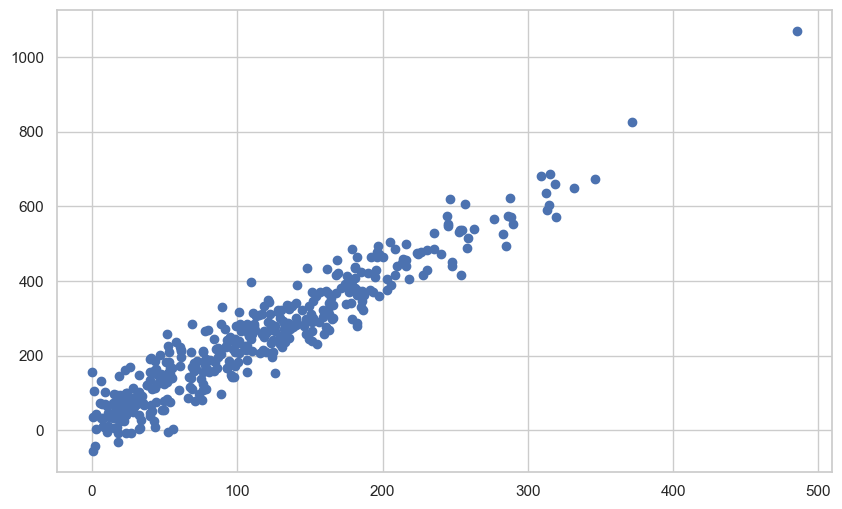

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
values = abs(np.random.normal(100, 100, 400))
values = values[values >= 0]

noise = np.random.normal(0, 50, 400)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.tight_layout()
plt.scatter(values, 2*values + noise + 25, label='y = 2x + noise + 25')



&nbsp; b) Now we want to remove some outliers according to this assumption: (*)
- no one talks more than 300 min using this type of subscription
- no ones costs can be negative
- plot the new dataset
- also plot ground truth using the true parameters $\beta_0 = 25, \beta_1 = 2$

Text(0.5, 1.0, 'Simulating phone call costs (25 + 2x) depending on call duration')

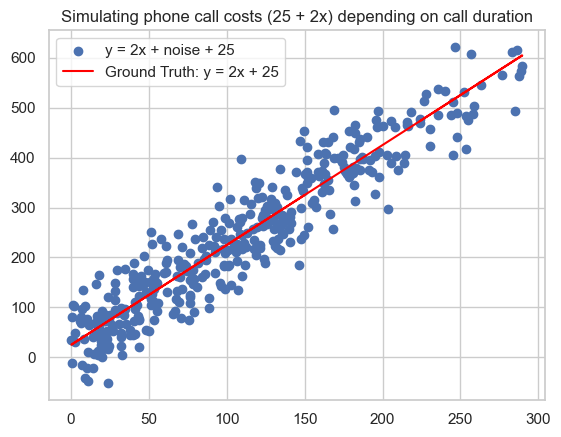

In [2]:
values = values[values < 300]

plt.scatter(values, 2*values + noise[:len(values)] + 25, label='y = 2x + noise + 25')
plt.plot(values, 2*values + 25, label='Ground Truth: y = 2x + 25', color='red')
# plt.scatter(values, 2*values + 25, label='Ground Truth', color='red')
plt.legend()
plt.title('Simulating phone call costs (25 + 2x) depending on call duration')


&nbsp; c) Insert the values into a DataFrame (*)

In [3]:
import pandas as pd

In [4]:
df = pd.DataFrame({'x': values, 'y': 2*values + 25})
df

,x,y
0,149.671415,324.342831
1,86.173570,197.347140
2,164.768854,354.537708
3,252.302986,529.605971
4,76.584663,178.169325
...,...,...
384,53.082435,131.164870
385,71.313453,167.626906
386,235.387237,495.774475
387,88.546015,202.092031




<details>

<summary>Answer</summary>

<img src="../assets/simulated_phone_dataset_0.png" height="200"/>

a) 

Number of points x ≥ 300 min: 8

Number of points y < 0 kr: 6


b)

Length of x, outliers removed 386

Length of y, outliers removed 386

c)

df.head()

|    |   Minutes |     Cost |
|---:|----------:|---------:|
|  0 |   59.4428 | 168.721  |
|  1 |   40.0625 |  98.2118 |
|  2 |  100.524  | 258.433  |
|  3 |  104.698  | 310.548  |
|  4 |   54.9935 | 123.279  |


</details>

---

## 1. Train|test split (*)

Before moving on with linear regression we shall first perform a train-test-split. 

&nbsp; a) Create a train-test-split function with the following call signature: (*)

```py
def train_test_split(X: pd.DataFrame, y: pd.DataFrame, train_fraction=.7: float, random_state=42: int, replace=False: bool) -> tuple
```

that returns the tuple:
```
(X_train, X_test, y_train, y_test)
```

In [5]:
def train_test_split(X: pd.DataFrame, y: pd.DataFrame, train_fraction=0.7, random_state=42, replace=False) -> tuple:
    """
    Split the data into training and testing sets.
    """
    np.random.seed(random_state)
    n = len(X)
    # Skulle även kunna använda df.sample(frac=0.7) för att få train och test
    train_indices = np.random.choice(range(n), int(train_fraction*n), replace=replace)
    test_indices = np.array(list(set(range(n)) - set(train_indices)))
    return X.iloc[train_indices], X.iloc[test_indices], y.iloc[train_indices], y.iloc[test_indices]



&nbsp; b) Now use this to split up your data into a training set and test set. Check manually that the split is performed correctly. (*)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df[['x']], df['y']+noise[:len(df['x'])])

len(X_train), len(X_test), len(y_train), len(y_test)
X_train, X_test, y_train, y_test

(              x
 271  106.980208
 46    53.936123
 167   24.626384
 42    88.435172
 350   17.276906
 ..          ...
 301   79.780735
 206  157.089051
 254   94.047464
 322   10.274563
 4     76.584663
 
 [272 rows x 1 columns],
               x
 1     86.173570
 8     53.052561
 13    91.328024
 14    72.491783
 20   246.564877
 ..          ...
 378   42.309634
 379   10.158533
 382  283.145877
 386  235.387237
 388  223.781631
 
 [117 rows x 1 columns],
 271    135.290905
 46     151.202158
 167     23.848452
 42      98.498239
 350     13.392149
           ...    
 301    237.011931
 206    300.488642
 254    341.762919
 322    -21.860145
 4      155.666051
 Name: y, Length: 272, dtype: float64,
 1      167.378389
 8      137.119904
 13     271.539890
 14     186.599267
 20     621.167150
           ...    
 378    105.897597
 379     76.350671
 382    610.301646
 386    537.470583
 388    469.054977
 Name: y, Length: 117, dtype: float64)



<details>

<summary>Hint</summary>

b) Check the length of each set, and check the indices of the sorted sets that they don't overlap and are not missing. Also check that they sum up to what you expect.

</details>

<br/>

<details>

<summary>Answer</summary>

Using default 0.7: 
- length of X_train: 270
- length of X_test: 116
- length of y_train: 270
- length of X_test: 116

</details>

---

## 2. Simple linear regression with normal equation (*)

Use the normal equation for simple linear regression to solve for the coefficients $\hat{\beta} = (\beta_0, \beta_1)$. Note that you should only use the training data to fit the regression line, and not data from the test set. Plot the the regression line, together with ground truth and training data. 

Intercept beta_0 hat: 25.5168
Slope beta_1 hat: 1.9604


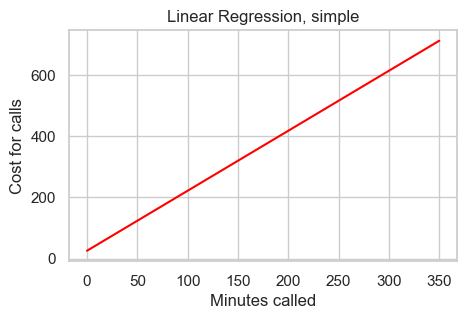

In [7]:
X, y = X_train["x"], y_train
# fits a polynomial of degree deg using least squares polynomial fit
beta_1, beta_0 = np.polyfit(X, y, deg=1)  # returns coefficient with highest power first

# predicted y, note that beta_0 and beta_1 are actually beta_0, beta_1 hats as they are sample estimates

y_hat = lambda x: beta_0 + beta_1 * x

print(f"Intercept beta_0 hat: {beta_0:.4f}")
print(f"Slope beta_1 hat: {beta_1:.4f}")

spend = np.linspace(0, 350)

fig, ax = plt.figure(figsize=(5, 3), dpi=100), plt.axes()

# sns.scatterplot(data=df, x=X_train, y=y_train, ax=ax, color="black")
sns.lineplot(x=spend, y=y_hat(spend), color="red")

ax.set(
    title="Linear Regression, simple",
    xlabel="Minutes called",
    ylabel="Cost for calls",
)

plt.show()

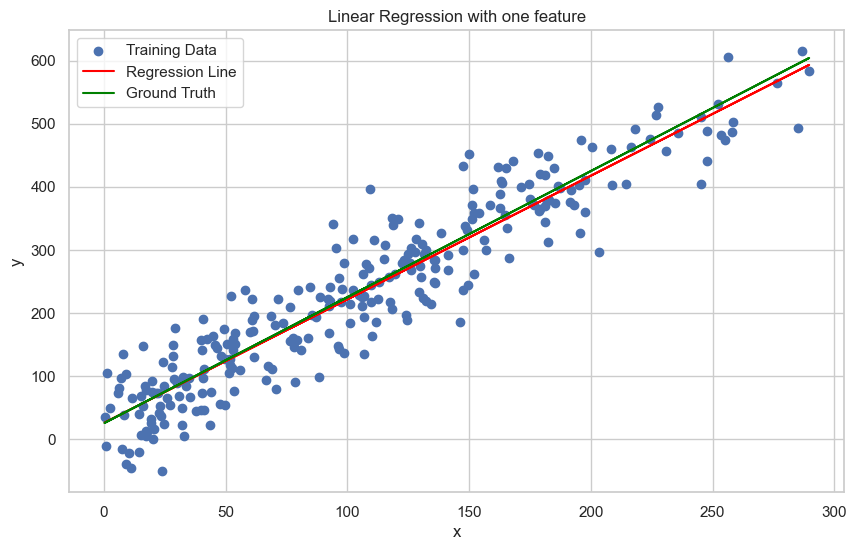

In [8]:
# Add a column of ones to X_train for the intercept term
X_train_with_intercept = np.column_stack((np.ones(len(X_train)), X_train))

# Compute the coefficients using the normal equation with pseudoinverse for robustness
beta = np.linalg.pinv(X_train_with_intercept.T @ X_train_with_intercept) @ X_train_with_intercept.T @ y_train

# Extract the intercept and slopes
intercept = beta[0]
slopes = beta[1:]

# For simplicity, the plotting assumes a single feature
if X_train.shape[1] == 1:
    # Plotting the regression line, ground truth, and training data
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train, y_train, label='Training Data')
    plt.plot(X_train, intercept + slopes[0] * X_train, color='red', label='Regression Line')    
    plt.plot(X_train, 25 + 2 * X_train, color='green', label='Ground Truth')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title('Linear Regression with one feature')
    
    plt.show()
else:
    print("Plotting is set up for a single feature dataset. Adjust plotting for multi-feature datasets.")



<details>

<summary>Hint</summary>

It is important to keep track of the shapes of the vectors, matrices in order for matrix multiplication matmul "@" to work correctly. Also, if you have series object, you need to convert it to numpy. 

</details>

<br/>

<details>

<summary>Answer</summary>


<img src="../assets/Reg_line_normal_eq.png" height="200"/>

</details>

---

## 3. Prediction and evaluation (*)

&nbsp; a) Use your model to make prediction on testing data. Plot the prediction cost against X_test, and y_test against X_test. (*)

In [9]:
print(f"{len(X_test) = }, {len(y_test) = }, {len(X_train) = }, {len(y_train) = }, {len(slopes) = }")

y_pred = intercept + X_test["x"] * slopes[0]
len(y_pred)

len(X_test) = 117, len(y_test) = 117, len(X_train) = 272, len(y_train) = 272, len(slopes) = 1


117

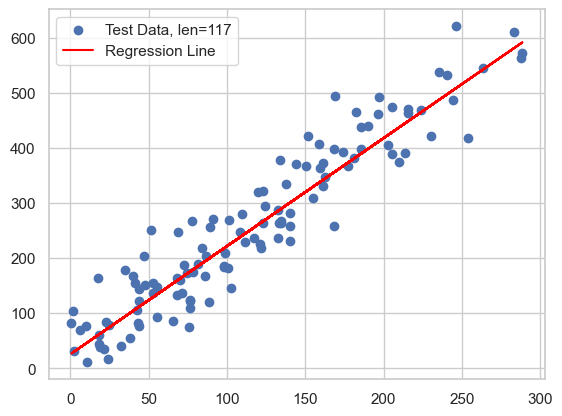

In [10]:
plt.scatter(X_test, y_test, label=f'Test Data, len={len(X_test)}')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.legend()

In [11]:
print(y_pred)

1      194.453100
8      129.522048
13     204.557990
14     167.631067
20     508.887253
          ...    
378    108.461411
379     45.431783
382    580.601337
386    486.974397
388    464.222547
Name: x, Length: 117, dtype: float64



&nbsp; b) Calculate MAE, MSE, RMSE (*)

In [12]:
import numpy as np
MAE = np.mean(np.abs(y_test - y_pred[1])) # Mean Absolute Error
MSE = np.mean((y_test - y_pred[1])**2) # Mean Squared Error
RMSE = np.sqrt(MSE) # Root Mean Squared Error

print(f"Mean Absolute Error: {MAE:.2f} kr")
print(f"Mean Squared Error: {MSE:.2f} kr")
print(f"Root Mean Squared Error: {RMSE:.2f} kr")

Mean Absolute Error: 130.31 kr
Mean Squared Error: 26892.16 kr
Root Mean Squared Error: 163.99 kr




<details>

<summary>Hint</summary>

Calculate y_pred from X_test and use y_test and y_pred to compute different evaluation metrics.

Careful with dimensions when computing the evaluation metrics, else it can be catastrophical logical errors due to numpy broadcasting feature.

Note that after you have calculate the error metrics on test data you are not allowed to change any parameters to make the line fit better to the testing data.

</details>

<br/>

<details>

<summary>Answer</summary>

a) 

<img src="../assets/eval_simple_lin_reg.png" height="200"/>

b)

Mean absolute error on testing data: 36.97 kr

Mean squared error on testing data: 2374 kr^2

Root mean squared error on testing data: 48.72 kr

</details>

---

## 4. Simulate more explanatory variables (\*)

Now we will simulate the explanatory variables for minutes, text messages and amount of surf. For reference and reproducibility use numpy random seed 42. Assume there is:

- mean start cost: 25kr
- mean cost per minute: 2kr
- mean cost per sms: 50 öre
- mean cost per GB: 50kr

Then the model for the cost will be:
$y = 25 + 2x_1 + 0.5x_2 + 50x_3 + \epsilon$, where

- $x_i$ sampled from r.v. $X_i$ for $i = \{1,2,3\}$
- $X_1 \sim |\mathcal{N}(100,100)|$, (absolute value)
- $X_2 \sim \mathcal{U}(0,50)$, (discrete uniform distribution)
- $X_3 \sim |\mathcal{N}(0,2)|$,
- $\epsilon \sim \mathcal{N}(0,50)$

&nbsp; a) Simulate 10000 samples of each of $x_1, x_2, x_3$ and $y$ and save them in a DataFrame. Also add an intercept column containing ones. (\*)

In [13]:
np.random.RandomState(42)
X0 = np.ones(10000)
X1 = np.abs(np.random.normal(100, 100, 10000))
X2 = np.random.uniform(0, 50, 10000)
X3 = np.abs(np.random.normal(0, 2, 10000))
noise = np.random.normal(0, 50, 10000)
Y = 25 + 2*X1 + 0.5*X2 + 50*X3 + noise

df = pd.DataFrame({'Y': Y, 'X0': X0, 'X1': X1, 'X2': X2, 'X3': X3, 'ε': noise})
df.head()

,Y,X0,X1,X2,X3,ε
0,478.857174,1.0,168.626019,26.686033,1.813297,12.597281
1,177.120683,1.0,61.271587,16.924026,0.560583,-6.913633
2,136.784388,1.0,52.806813,32.897541,0.584968,-39.526428
3,513.128190,1.0,208.895060,35.886113,0.724805,16.154771
4,252.968263,1.0,106.428002,27.902449,0.463756,-22.026763


In [14]:
df.describe()

,Y,X0,X1,X2,X3,ε
count,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000
mean,349.077361,1.0,116.654683,25.394198,1.584646,-1.161425
std,178.608521,0.0,80.080632,14.482868,1.191316,50.224826
min,-79.901769,1.0,0.033132,0.002406,0.000122,-223.280193
25%,213.875733,1.0,51.610226,12.926006,0.622810,-35.527775
50%,327.585573,1.0,104.741793,25.590569,1.356998,-1.056383
75%,463.503474,1.0,168.423503,37.891078,2.294095,33.438666
max,1273.886256,1.0,492.623771,49.996241,7.884662,186.391667


In [15]:
print(f"{df[df['Y'] > 300].count() = }")
print(f"{df[df['Y'] < 0].count() = }")
df = df[df['Y'] <= 300]
df = df[df['Y'] > 0]

df.info()

df[df['Y'] > 300].count() = Y     5610
X0    5610
X1    5610
X2    5610
X3    5610
ε     5610
dtype: int64
df[df['Y'] < 0].count() = Y     40
X0    40
X1    40
X2    40
X3    40
ε     40
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 4350 entries, 1 to 9993
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       4350 non-null   float64
 1   X0      4350 non-null   float64
 2   X1      4350 non-null   float64
 3   X2      4350 non-null   float64
 4   X3      4350 non-null   float64
 5   ε       4350 non-null   float64
dtypes: float64(6)
memory usage: 237.9 KB



&nbsp; b) Make histograms for each of the explanatory variables $x_1, x_2, x_3$ and the response variable $y$ (\*)

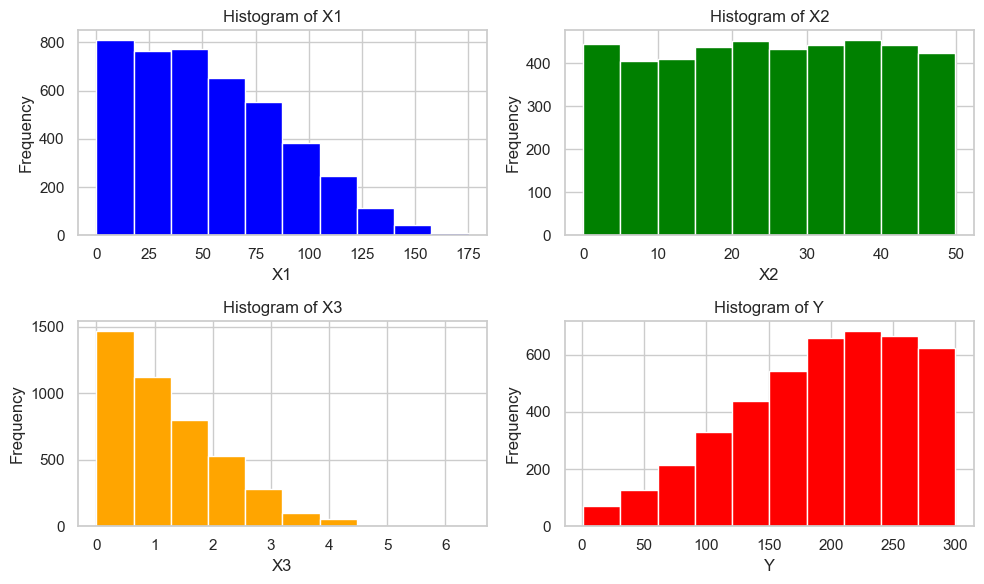

In [16]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.hist(df['X1'], bins=10, color='blue')
plt.xlabel('X1')
plt.ylabel('Frequency')
plt.title('Histogram of X1')

plt.subplot(2, 2, 2)
plt.hist(df['X2'], bins=10, color='green')
plt.xlabel('X2')
plt.ylabel('Frequency')
plt.title('Histogram of X2')

plt.subplot(2, 2, 3)
plt.hist(df['X3'], bins=10, color='orange')
plt.xlabel('X3')
plt.ylabel('Frequency')
plt.title('Histogram of X3')

plt.subplot(2, 2, 4)
plt.hist(df['Y'], bins=10, color='red')
plt.xlabel('Y')
plt.ylabel('Frequency')
plt.title('Histogram of Y')

plt.tight_layout()
plt.show()



&nbsp; c) Clean the data using the following constraints (\*)

- surf should be less than 4
- minutes should be less than 300
- cost should be larger than 0

In [17]:
print(df[df["X3"] >= 4].count())
df = df[df["X3"] < 4]

Y     42
X0    42
X1    42
X2    42
X3    42
ε     42
dtype: int64


&nbsp; d) Make new histograms for the variables. (\*)

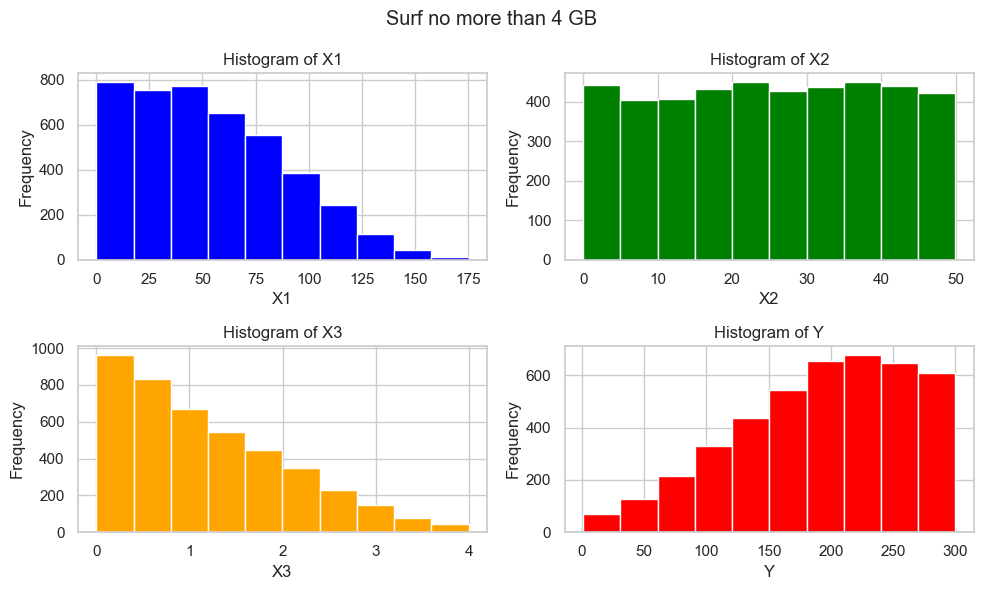

In [18]:
plt.figure(figsize=(10, 6))
plt.suptitle("Surf no more than 4 GB")
plt.subplot(2, 2, 1)
plt.hist(df['X1'], bins=10, color='blue')
plt.xlabel('X1')
plt.ylabel('Frequency')
plt.title('Histogram of X1')

plt.subplot(2, 2, 2)
plt.hist(df['X2'], bins=10, color='green')
plt.xlabel('X2')
plt.ylabel('Frequency')
plt.title('Histogram of X2')

plt.subplot(2, 2, 3)
plt.hist(df['X3'], bins=10, color='orange')
plt.xlabel('X3')
plt.ylabel('Frequency')
plt.title('Histogram of X3')

plt.subplot(2, 2, 4)
plt.hist(df['Y'], bins=10, color='red')
plt.xlabel('Y')
plt.ylabel('Frequency')
plt.title('Histogram of Y')

plt.tight_layout()
plt.show()



<details>

<summary>Hint</summary>
Your data analysis skill toolbox together with statistics and linear algebra skills are getting quite handy here.

</details>

<br/>

<details>

<summary>Answer</summary>

a)

|      | Intercept | Minutes | SMS | Surf (GB) |    Cost |
| ---: | --------: | ------: | --: | --------: | ------: |
|    0 |         1 | 149.671 |  41 |   2.26301 | 502.396 |
|    1 |         1 | 86.1736 |  16 | 0.0315695 | 179.072 |
|  ... |       ... |     ... | ... |       ... |     ... |
| 9318 |         1 | 149.577 |  31 |   3.43929 | 536.176 |
| 9319 |         1 | 164.439 |  43 |   1.40641 | 406.674 |

b)

<img src="../assets/hist_variables.png" height="200"/>

d)

<img src="../assets/hist_var_cleaned.png" height="200"/>

</details>

---


## 5. Multiple linear regression (*)

&nbsp; a) Perform a train|test split with 0.8 of the data for training. (*)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df[['X0','X1','X2','X3']], df['Y']+noise[:len(df['X1'])], train_fraction=0.8, random_state=42, replace=False)

len(X_train), len(X_test), len(y_train), len(y_test)
X_train, X_test, y_train, y_test

(       X0          X1         X2        X3
 325   1.0   79.695461  17.342851  1.646699
 8985  1.0   84.293691  46.373064  0.707132
 7281  1.0  109.982632  17.272180  0.631411
 6365  1.0   73.996375  29.028351  0.352191
 7950  1.0  126.250289  38.081349  0.145497
 ...   ...         ...        ...       ...
 5016  1.0  117.991437  21.406742  0.591331
 3141  1.0   35.544750  43.777833  2.367235
 6576  1.0   71.787422  48.473176  0.690814
 6425  1.0    6.340799  44.843912  1.818259
 1791  1.0    6.009690  12.555614  1.809500
 
 [3446 rows x 4 columns],
        X0         X1         X2        X3
 4786  1.0  26.576668  12.145484  1.981606
 4787  1.0  85.847036  30.443355  0.801472
 9560  1.0  10.975013  43.488690  0.375333
 9562  1.0  54.756979  21.221880  0.644790
 6     1.0  28.469629   8.494144  1.692090
 ...   ...        ...        ...       ...
 4752  1.0  47.203707  29.559239  1.992598
 9532  1.0  54.231544  48.201036  1.163340
 4761  1.0  85.279472  17.991602  1.451767
 9537  1.0  44


&nbsp; b) Use the normal equation to compute $\hat{\beta}$ (*)

In [20]:
X, y = X_train[["X0", "X1", "X2", "X3"]], y_train
print(len(X))
print(len(y))
# fits a polynomial of degree deg using least squares polynomial fit
b = np.linalg.inv(X.T @ X) @ X.T @ y 
b
# predicted y, note that beta_0 and beta_1 are actually beta_0, beta_1 hats as they are sample estimates

y_hat = lambda x1,x2,x3: b[0] + b[1] * x1 + b[2] * x2 + b[3] * x3

print(f"Intercept beta_0 hat: {b[0]:.4f}")
print(f"Slope beta_1 hat: {b[1]:.4f}")
print(f"Slope beta_2 hat: {b[2]:.4f}")
print(f"Slope beta_3 hat: {b[3]:.4f}")

3446
3446
Intercept beta_0 hat: 64.4143
Slope beta_1 hat: 1.4508
Slope beta_2 hat: 0.2837
Slope beta_3 hat: 34.4138


&nbsp; c) Predict on the test data and compute MAE, MSE and RMSE. (*)

In [21]:
y_pred = b[0] + b[1]*X["X1"] + b[2]*X["X2"] + b[3]*X["X3"]

In [22]:
MAE = np.mean(np.abs(y_test - y_pred[1])) # Mean Absolute Error
MSE = np.mean((y_test - y_pred[1])**2) # Mean Squared Error
RMSE = np.sqrt(MSE) # Root Mean Squared Error

print(f"Mean Absolute Error: {MAE:.2f} kr")
print(f"Mean Squared Error: {MSE:.2f} kr")
print(f"Root Mean Squared Error: {RMSE:.2f} kr")

Mean Absolute Error: 71.65 kr
Mean Squared Error: 7511.14 kr
Root Mean Squared Error: 86.67 kr


&nbsp; d) Now repeat 4a), 4c), 5a), 5b) using 10, 100, 1000, 10000, 100000, 1000000 samples, and calculate RMSE for each of these simulations. Plot the RMSE against sample size. (**)

For 10^1 rows:
Intercept beta_0 hat: 0.5086
Slope beta_1 hat: 0.3501
Slope beta_2 hat: 7.4810
Slope beta_3 hat: 1.7194

Mean Absolute Error: 93.77
Mean Squared Error: 8793.48
Root Mean Squared Error: 93.77

For 10^2 rows:
Intercept beta_0 hat: 50.7068
Slope beta_1 hat: 1.6231
Slope beta_2 hat: 0.5998
Slope beta_3 hat: 44.1400

Mean Absolute Error: 29.93
Mean Squared Error: 1361.62
Root Mean Squared Error: 36.90

For 10^3 rows:
Intercept beta_0 hat: 66.3542
Slope beta_1 hat: 1.4314
Slope beta_2 hat: 0.5866
Slope beta_3 hat: 31.1347

Mean Absolute Error: 38.07
Mean Squared Error: 2223.74
Root Mean Squared Error: 47.16

For 10^4 rows:
Intercept beta_0 hat: 55.4684
Slope beta_1 hat: 1.5033
Slope beta_2 hat: 0.3151
Slope beta_3 hat: 39.9672

Mean Absolute Error: 35.67
Mean Squared Error: 1983.25
Root Mean Squared Error: 44.53

For 10^5 rows:
Intercept beta_0 hat: 56.0357
Slope beta_1 hat: 1.4954
Slope beta_2 hat: 0.3740
Slope beta_3 hat: 39.1418

Mean Absolute Error: 35.78
Mean Squared Erro

For 10^6 rows:
Intercept beta_0 hat: 54.8954
Slope beta_1 hat: 1.5035
Slope beta_2 hat: 0.3949
Slope beta_3 hat: 39.4374

Mean Absolute Error: 35.44
Mean Squared Error: 1958.03
Root Mean Squared Error: 44.25



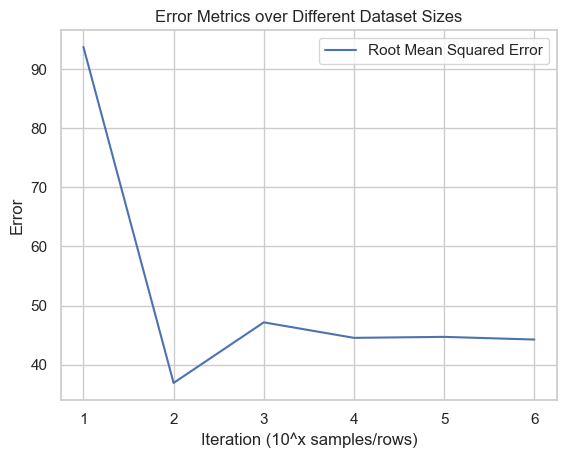

In [27]:
from sklearn.model_selection import train_test_split

MAE_vector = []
MSE_vector = []
RMSE_vector = []

for i in range(1, 7):
    rng = np.random.RandomState(42)
    X0 = np.ones(10**i)
    X1 = np.abs(rng.normal(100, 100, 10**i))
    X2 = rng.uniform(0, 50, 10**i)
    X3 = np.abs(rng.normal(0, 2, 10**i))
    noise = rng.normal(0, 50, 10**i)
    Y = 25 + 2*X1 + 0.5*X2 + 50*X3 + noise

    df = pd.DataFrame({'Y': Y, 'X0': X0, 'X1': X1, 'X2': X2, 'X3': X3})

    df = df[df['Y'] <= 300]
    df = df[df['Y'] > 0]
    df = df[df["X3"] < 4]

    X_train, X_test, y_train, y_test = train_test_split(df[['X0','X1','X2','X3']], df['Y'], test_size=0.2, random_state=42)

    X, y = X_train, y_train
    
    lambda_ = 1  # Regularisation parameter
    b = np.linalg.inv(X.T @ X + lambda_ * np.eye(X.shape[1])) @ X.T @ y

    print("For 10^" + str(i) + " rows:")
    print("============================")
    print(f"Intercept beta_0 hat: {b[0]:.4f}")
    print(f"Slope beta_1 hat: {b[1]:.4f}")
    print(f"Slope beta_2 hat: {b[2]:.4f}")
    print(f"Slope beta_3 hat: {b[3]:.4f}\n")

    # Calculate y_hat 
    y_pred = b[0] + b[1] * X_test['X1'] + b[2] * X_test['X2'] + b[3] * X_test['X3']

    MAE = np.mean(np.abs(y_test - y_pred))
    MSE = np.mean((y_test - y_pred)**2)
    RMSE = np.sqrt(MSE)

    MAE_vector.append(MAE)
    MSE_vector.append(MSE)
    RMSE_vector.append(RMSE)

    print(f"Mean Absolute Error: {MAE:.2f}")
    print(f"Mean Squared Error: {MSE:.2f}")
    print(f"Root Mean Squared Error: {RMSE:.2f}\n")

# plt.plot(range(1,7), MAE_vector, label="Mean Absolute Error")
# plt.plot(range(1,7), MSE_vector, label="Mean Squared Error")
plt.plot(range(1,7), RMSE_vector, label="Root Mean Squared Error")
plt.legend()
plt.xlabel("Iteration (10^x samples/rows)")
plt.ylabel("Error")
plt.title("Error Metrics over Different Dataset Sizes")
plt.show()




<details>

<summary>Hint</summary>

It is important to keep track of the shapes of the vectors, matrices in order for matrix multiplication matmul "@" to work correctly. Also, if you have series object, you need to convert it to numpy. 

</details>

<br/>

<details>
<summary>Answer</summary>


<img src="../assets/RMSE_simulation.png" height="200"/>

</details>

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---